In [47]:
## Goal: Explore data w/ visualizations for Adventure Works dataset
      #    for purpose of Classification Supervised ML w/ label= AveMonthSpend

# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss

%matplotlib inline  
# Start of magic command which configures execution environment, to display graphics w/in notebook

In [48]:
# Load already prepared dataset, display shape, & explore first 10 rows of Pandas data frame

AW_Custs_R = pd.read_csv('AW_Custs_R_Preped.csv', header=0)
print(AW_Custs_R.shape)
AW_Custs_R.head(5)

(16404, 25)


,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,...,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AveMonthSpend,BikeBuyer,AgeGroup,log_AveMonthSpend,log_Age,log_YearlyIncome
0,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,4/8/1966,Bachelors,...,0,2,137947,31,89,0,25-45,4.488636,3.433987,11.834625
1,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,5/14/1965,Bachelors,...,3,3,101141,32,117,1,25-45,4.762174,3.465736,11.524271
2,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,8/12/1965,Bachelors,...,3,3,91945,32,123,0,25-45,4.812184,3.465736,11.428946
3,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,2/15/1968,Bachelors,...,0,0,86688,29,50,0,25-45,3.912023,3.367296,11.370071
4,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,8/8/1968,Bachelors,...,5,5,92771,29,95,1,25-45,4.553877,3.367296,11.437889


In [49]:
## PREDICTION TEST

# Load already prepared TEST PREDICTION dataset, display shape, & explore first 10 rows of Pandas data frame


AW_Custs_TestR = pd.read_csv('AW_testAge_Preped.csv', header=0)
print(AW_Custs_TestR.shape)
AW_Custs_TestR.head()

(500, 19)


,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,Courtney,Baker,8727 Buena Vista Ave.,Fremont,California,United States,94536,133-555-0128,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931,52
1,Adam,Allen,3491 Cook Street,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,33
2,Bonnie,Raji,359 Pleasant Hill Rd,Burbank,California,United States,91502,409-555-0193,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985,63
3,Julio,Alonso,8945 Euclid Ave.,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,39
4,Christy,Andersen,"42, boulevard Tremblay",Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876,32


In [50]:
# Testing for Class Imbalance by Examining Classes where label= BikeBuyer
 # Unequal numbers of cases for the categories of labels, which can seriously bias the training of classifier alogrithms 
 #  higher error rate for the minority class. This should be tested for before training any model.   

AW_Custs_R_counts =  AW_Custs_R['AveMonthSpend'].value_counts()
print(AW_Custs_R_counts) 

48     386
52     378
51     367
47     364
50     361
49     359
46     334
53     333
54     332
45     312
76     304
75     298
77     290
43     289
55     275
73     270
74     265
68     264
72     262
79     262
56     261
70     259
78     254
57     252
66     250
71     249
44     242
69     235
65     234
64     234
      ... 
124     19
132     19
120     19
128     17
167     17
158     17
33      16
144     16
162     15
159     14
163     14
32      13
169     13
161     12
166     12
164     11
170      7
171      6
29       5
31       5
172      4
173      4
26       3
30       3
25       2
176      2
174      2
175      2
24       1
22       1
Name: AveMonthSpend, Length: 152, dtype: int64


In [51]:
#Above- Knowing imbalance exists, the best accuracy we can get w/out creating a ML model is 70%.
 # This is achieved by guessing all customers will buy a bike
    
#Below- Create a numpy array of label values

#labels = np.array(AW_Custs_R['AveMonthSpend'])
log_labels = np.array(AW_Custs_R['log_AveMonthSpend'])

In [52]:
#Create a numpy array with all of the features (Model Matrix)
 # Encode categorical string variables into integers. 
 # Transform integer coded variables to dummy variables.
 # Append each dummy coded categorical variable to model matrix.
    
def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()  # Encode strings to numeric categories
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    
    ohe = preprocessing.OneHotEncoder()  #Apply One Hot Encoder
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']

Features = encode_string(AW_Custs_R['Occupation'])
for col in categorical_columns:
    temp = encode_string(AW_Custs_R[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)
print(Features[:2, :])

(16404, 31)
[[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 1. 0. 0.]]


In [53]:
# 6 categorical variables were converted into 31 dummy variables. 

# Append numeric features to model matrix

Norm_Features = np.concatenate([Features, np.array(AW_Custs_R[['YearlyIncome', 'Age']])], axis = 1)

print(Norm_Features.shape)
print(Norm_Features[:2, :])

(16404, 33)
[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.37947e+05 3.10000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.01141e+05 3.20000e+01]]


In [54]:
# 2 numerical variables appended to matrix

#Below- How many dummy variables came from checking_account_status? -5-
print(AW_Custs_R['Occupation'].unique())

['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']


In [55]:
# PREDICTION Create a numpy array with all of the features (Model Matrix)
 # Encode categorical string variables into integers. 
 # Transform integer coded variables to dummy variables.
 # Append each dummy coded categorical variable to model matrix.
    
def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()  # Encode strings to numeric categories
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    
    ohe = preprocessing.OneHotEncoder()  #Apply One Hot Encoder
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']

Features_TestR = encode_string(AW_Custs_TestR['Occupation'])
for col in categorical_columns:
    temp = encode_string(AW_Custs_TestR[col])
    Features_TestR = np.concatenate([Features_TestR, temp], axis = 1)
    
print(Features_TestR.shape)
print(Features_TestR[:2, :])

(500, 31)
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 1. 0.]]


In [56]:
# Append numeric features to model matrix

Features_TestR = np.concatenate([Features_TestR, np.array(AW_Custs_TestR[['YearlyIncome', 'Age']])], axis = 1)

print(Features_TestR.shape)
print(Features_TestR[:2, :])

(500, 33)
[[0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 8.69310e+04 5.20000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00125e+05 3.30000e+01]]


In [57]:
# 2 numerical variables appended to matrix

#Below- How many dummy variables came from checking_account_status? -5-
print(AW_Custs_TestR['Occupation'].unique())

['Management' 'Skilled Manual' 'Manual' 'Clerical' 'Professional']


In [59]:
## Normal Features w/ Log of Label
 #Create randomly sampled log-y training & test data (Bernoulli sample) sets from sklearn.model_selection

nr.seed(9988)  #set seed
indx = range(Norm_Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
x_train = Norm_Features[indx[0], :]
logy_train = np.ravel(log_labels[indx[0]])
x_test = Norm_Features[indx[1], :]
logy_test = np.ravel(log_labels[indx[1]])
x_predict = Features_TestR
#print(x_test)
print(x_predict)

[[0.00000e+00 1.00000e+00 0.00000e+00 ... 1.00000e+00 8.69310e+04
  5.20000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00125e+05
  3.30000e+01]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 1.03985e+05
  6.30000e+01]
 ...
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 1.38097e+05
  6.00000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.01465e+05
  4.00000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.91080e+04
  5.00000e+01]]


In [34]:
#Below- Build & test PREDICTION model using estimated optimal hyperparameters

nr.seed(9988)  #set seed
indx = range(Features_TestR.shape[0])
#indx = ms.train_test_split(indx, test_size = 5000)
#x_train = Norm_Features[indx[0], :]
#logy_train = np.ravel(log_labels[indx[0]])

#logy_test = np.ravel(log_labels[indx[1]])
print(x_predict)

[[0.00000e+00 1.00000e+00 0.00000e+00 ... 1.00000e+00 8.69310e+04
  5.20000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00125e+05
  3.30000e+01]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 1.03985e+05
  6.30000e+01]
 ...
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 1.38097e+05
  6.00000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.01465e+05
  4.00000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.91080e+04
  5.00000e+01]]


In [61]:
# Need to rescale the numeric features so they don't carry a larger influence on 
 #the model using scikit learn to Zscore numeric features first on training then test data set

scaler = preprocessing.StandardScaler().fit(x_train[:, 31:])
x_train[:, 31:] = scaler.transform(x_train[:, 31:])
x_test[:, 31:] = scaler.transform(x_test[:, 31:])
x_predict[:, 31:] = scaler.transform(x_predict[:, 31:])
x_predict[:5, :]
#x_train[:5, :]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.22230013,  1.47665121],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.55456849, -0.21858175],
       [ 0.        ,  1.    

In [62]:
# Make the linear regression model using sklearn import linear_model

lin_mod2 = linear_model.LinearRegression(fit_intercept = False)  #intercept will be accomidated in coefficients of dummy variables
lin_mod2.fit(x_train, logy_train)  #fit the model w/ numpy array of features & label

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [63]:
#Examine intercept and coefficients of training data

print(lin_mod2.intercept_)
print(lin_mod2.coef_)

0.0
[ 5.61599416e+11  5.61599416e+11  5.61599416e+11  5.61599416e+11
  5.61599416e+11  3.09446236e+11  3.09446236e+11  3.09446236e+11
  3.09446236e+11  3.09446236e+11  6.15765166e+11  6.15765166e+11
 -6.83892511e+11 -6.83892511e+11 -3.54326351e+10 -3.54326351e+10
 -3.54326351e+10 -3.54326351e+10 -3.54326351e+10 -4.49933052e+11
 -4.49933052e+11 -4.49933052e+11 -4.49933052e+11 -4.49933052e+11
 -4.49933052e+11 -3.17552620e+11 -3.17552620e+11 -3.17552620e+11
 -3.17552620e+11 -3.17552620e+11 -3.17552620e+11  9.88769531e-02
 -3.22875977e-02]


In [64]:
#Above- Intercept is 0.0. Dummy variables are in similiar range, indicating bias/intercept has been
 # incorporated in them. Numerical values increase for first variable but weakly decrease for second.
    
#Below- Evaluate performance of model using test data set by computing performance metrics

def print_metrics(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters -1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
y_score = lin_mod2.predict(x_test)
print_metrics(logy_test, y_score, 33)

Mean Square Error      = 0.003523437125484758
Root Mean Square Error = 0.059358547198232185
Mean Absolute Error    = 0.04525844757647743
Median Absolute Error  = 0.03607004177299089
R^2                    = 0.9704619918071296
Adjusted R^2           = 0.9702716925797947


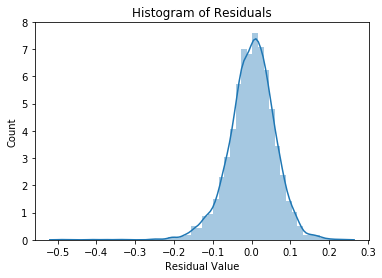

In [65]:
#Above- RMSE, MAE, Median absolute error are small & in similiar range. 
 # R^2 & R^2adj are barely different, indicating model may not be overfit & might generalize well.
    
def hist_resids(logy_test, y_score):
    resids = np.subtract(logy_test.reshape(-1,1), y_score.reshape(-1,1))  #compute vector of residuals
    sns.distplot(resids)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    
hist_resids(logy_test, y_score)

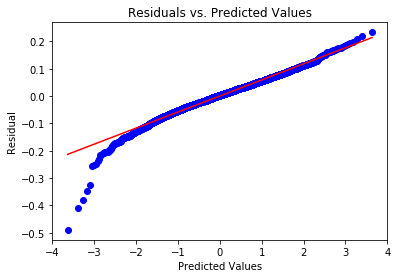

In [66]:
#Above- Residuals are large in range, but noticably Gaussian in distribution

#Below- Examine Q-Q normal plot

def resid_qq(logy_test, y_score):
    resids = np.subtract(logy_test.reshape(-1,1), y_score.reshape(-1,1))  #compute vector of residuals
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_qq(logy_test, y_score)

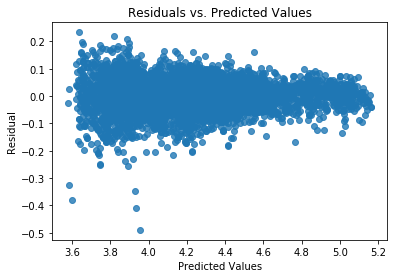

In [67]:
#Above- close to normally distributed with large residuals deviating from line (skew)

#Below- Display plot of residuals vs. predicted values

def resid_plot(logy_test, y_score):
    resids = np.subtract(logy_test.reshape(-1,1), y_score.reshape(-1,1))   #comput vector of residuals
    sns.regplot(y_score, resids, fit_reg = False)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_plot(logy_test, y_score)

In [45]:
# Need to rescale the numeric features so they don't carry a larger influence on 
 #the model using scikit learn to Zscore numeric features first on training then test data set

scaler = preprocessing.StandardScaler().fit(x_train[:, 31:])
x_train[:, 31:] = scaler.transform(x_train[:, 31:])
x_predict[:, 31:] = scaler.transform(x_predict[:, 31:])
x_predict[:5, :]

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 8.69310e+04, 5.20000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00125e+05, 3.30000e+01],
       [0.00000e+00, 1.00000

In [ ]:
# Make the linear regression model using sklearn import linear_model

#lin_modFinal = linear_model.LinearRegression(fit_intercept = False)  #intercept will be accomidated in coefficients of dummy variables
#lin_modFinal.fit(x_predict, logy_train)  #fit the model w/ numpy array of features & label

In [68]:
y_predict = lin_mod2.predict(x_predict)
print(y_predict)


[3.82788086 4.68908691 3.89898682 4.45812988 4.05029297 3.83599854
 4.55126953 4.9152832  4.56970215 4.05477905 4.05908203 3.93847656
 4.25469971 3.87121582 3.78063965 3.94580078 4.42736816 4.2510376
 4.63134766 4.04968262 4.15893555 4.30603027 5.13745117 4.39898682
 4.02587891 4.2699585  4.47485352 4.7911377  4.30505371 4.09362793
 4.19445801 4.34846497 3.79968262 4.23526001 4.57141113 4.65576172
 5.14361572 4.54614258 4.03637695 4.48046875 3.88342285 4.3371582
 4.37127686 3.89611816 4.07641602 4.28627014 4.0612793  4.378479
 4.8269043  4.35784912 4.35656738 4.47143555 4.33850098 4.11804199
 3.89245605 4.30957031 4.05163574 4.2723999  4.14300537 4.22077942
 3.88021851 4.15960693 4.50268555 4.32714844 3.85021973 4.30603027
 4.36730957 5.00317383 4.15420532 4.58728027 4.36694336 4.20617676
 4.52990723 3.85995483 4.14593506 4.31481934 4.76327515 4.16958618
 4.10247803 3.89855957 4.39562988 4.25085449 3.90289307 4.44015503
 4.45031738 3.92236328 4.44445801 4.84399414 4.53271484 3.98699951

In [69]:

#Below- Above plot is for log of AveMonthSpend, need to convert back to normal AveMonthSpend.

#y_score_untransform = np.exp(y_score)
y_predict_untransform = np.exp(y_predict)
#resid_plot(y_test_untransform, y_score_untransform)
print(y_predict_untransform)

[ 45.96502859 108.75383286  49.3524207   86.32591846  57.41427517
  46.33967637  94.75262341 136.35792132  96.51535824  57.67241903
  57.92111689  51.34032791  70.43566268  48.00071086  43.84407756
  51.71773613  83.71081361  70.17819131 102.65231096  57.37924297
  64.00335775  74.14556632 170.28119723  81.36838577  56.02953185
  71.51866725  87.78174081 120.43831285  74.07319389  59.95701745
  66.31777812  77.35962207  44.68699936  69.07963778  96.6804425
 105.18931416 171.33414646  94.26807434  56.62083082  88.27604237
  48.59024796  76.48986154  79.14462346  49.21104864  58.93387282
  72.69482082  58.04852489  79.71669237 124.82394405  78.08899369
  77.98896816  87.48221774  76.59263908  61.43882671  49.03116198
  74.40850966  57.49142132  71.69348669  62.99185114  68.08653155
  48.4347972   64.04634319  90.25920143  75.72803516  47.00338999
  74.14556632  78.83125619 148.88494525  63.70132241  98.22691619
  78.8023926   67.0995111   92.74995595  47.4632076   63.17666818
  74.800108

In [71]:
#Below- Save the PREDICTED LABEL data as a csv

Y_PREDICT = pd.DataFrame(y_predict_untransform) 

Y_PREDICT.to_csv('AW_TestR_Predicted.csv', index = False, header = True)